In [23]:
#Importing the dataset
import pandas as pd
ad = pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
# Normalisisng the data
ad = (ad - ad.mean())/ad.std()
ad.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [25]:
# Simple linear regression
# Assign feature variable X
X = ad[['TV','Radio','Newspaper']]

# Assign response variable to y
y = ad['Sales']

In [26]:
X['intercept'] = 1
X = X.reindex(['intercept','TV','Radio','Newspaper'], axis=1)

In [27]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


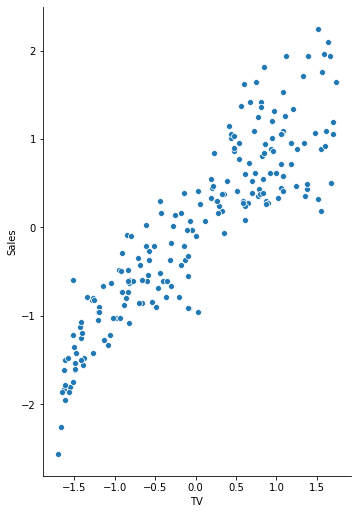

In [28]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(ad, x_vars='TV', y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [29]:
ad.head(5)

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [30]:
import numpy as np
X = np.array(X)
y = np.array(y)
print(X,y)

[[ 1.00000000e+00  9.67424597e-01  9.79065591e-01  1.77449253e+00]
 [ 1.00000000e+00 -1.19437904e+00  1.08009740e+00  6.67902716e-01]
 [ 1.00000000e+00 -1.51235985e+00  1.52463736e+00  1.77908419e+00]
 [ 1.00000000e+00  5.19193949e-02  1.21480648e+00  1.28318502e+00]
 [ 1.00000000e+00  3.93195507e-01 -8.39506984e-01  1.27859336e+00]
 [ 1.00000000e+00 -1.61136487e+00  1.72670098e+00  2.04080875e+00]
 [ 1.00000000e+00 -1.04295960e+00  6.42292892e-01 -3.23895625e-01]
 [ 1.00000000e+00 -3.12652015e-01 -2.46787034e-01 -8.70303044e-01]
 [ 1.00000000e+00 -1.61252963e+00 -1.42549148e+00 -1.35701890e+00]
 [ 1.00000000e+00  6.14500836e-01 -1.39181421e+00 -4.29503781e-01]
 [ 1.00000000e+00 -9.42789820e-01 -1.17627968e+00 -2.91754012e-01]
 [ 1.00000000e+00  7.88050805e-01  4.95729413e-02 -1.21926913e+00]
 [ 1.00000000e+00 -1.43548537e+00  7.97208333e-01  1.62296778e+00]
 [ 1.00000000e+00 -5.77053645e-01 -1.05504151e+00 -1.07233604e+00]
 [ 1.00000000e+00  6.64585726e-01  6.49028346e-01  7.09227646e

In [31]:
# Theta is the vector representing coefficients (intercept, TV ,Radio ,Newspaper )
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

In [32]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [33]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [34]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[-9.503509090791341e-18, 0.008967018737358192,...",0.488054
1,"[-1.8873791418627663e-17, 0.0178420325875863, ...",0.478812
2,"[-2.828848266744899e-17, 0.026626000134855474,...",0.469770
3,"[-3.7747582837255325e-17, 0.03531986978687297,...",0.460923
4,"[-4.698463840213663e-17, 0.043924579885335935,...",0.452267
...,...,...
995,"[-5.793809876308837e-16, 0.884604822565373, 0....",0.048461
996,"[-5.793143742494062e-16, 0.8846052708861454, 0...",0.048461
997,"[-5.792366586376824e-16, 0.884605714844278, 0....",0.048461
998,"[-5.792366586376824e-16, 0.8846061544823369, 0...",0.048461


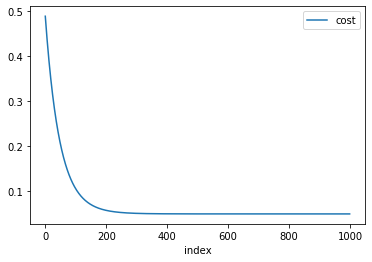

In [35]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])